In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.optimize import leastsq


In [ ]:
# Don't forget!!! Needed for google collab run but dont include if you're running locally
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

root_dir = "/content/gdrive/MyDrive/"
base_dir = root_dir + 'uni_wien/BIOTIMA/beam_profiling'

Mounted at /content/gdrive


In [ ]:
!ls /content/gdrive/MyDrive/uni_wien/BIOTIMA/beam_profiling

beam_profiling.ipynb   m2h_10_2023_11_10.mp4  m2v_01_2023_11_10.mp4  m2v_12_2023_11_10.mp4
m2h_00_2023_11_10.mp4  m2h_11_2023_11_10.mp4  m2v_02_2023_11_10.mp4  m2v_13_2023_11_10.mp4
m2h_01_2023_11_10.mp4  m2h_12_2023_11_10.mp4  m2v_03_2023_11_10.mp4  m2v_14_2023_11_10.mp4
m2h_02_2023_11_10.mp4  m2h_13_2023_11_10.mp4  m2v_04_2023_11_10.mp4  second_try
m2h_03_2023_11_10.mp4  m2h_14_2023_11_10.mp4  m2v_10_2023_11_10.mp4
m2h_04_2023_11_10.mp4  m2v_00_2023_11_10.mp4  m2v_11_2023_11_10.mp4


In [ ]:
# Running locally
# base_dir = ''

In [ ]:
import os
import sys

current_path = os.path.dirname(os.path.abspath('./'))
sys.path.append(os.path.join(current_path, "/home/buzz/anaconda3/lib/python3.9/"))

In [ ]:
from math import pi
pixel_width = 2.4e-6 # pixel width in horizontal(1920) direction
_lambda = 337e-6 # wavelength of beam in mm

def waist_profile(M,w_0,x):
    return w_0*(1+M**4*(_lambda*x/(pi*(w_0)**2))**2)**.5

def waist_profile_residual(p,x,t):
    M,w_0 = p
    sim = waist_profile(M,w_0,x)
    return t-sim

def gaussian(A_0,w,x_0,x):
    return A_0*np.exp(-2*(x-x_0)**2/(w**2))

def gaussian_residual(p,x,t):
    A_0,w,x_0 = p
    sim = gaussian(A_0,w,x_0,x)
    return t-sim

In [ ]:
pixel_width_h = 4.8125e-6
pixel_width_v = 4.8125e-6

In [ ]:
def minimal_plot(x,y,plot_type='plot',marker='o', linestyle='-', color='dodgerblue', markersize=5, linewidth=1.5,alpha=1,size_x=8,size_y=6,x_label='',y_label='',yerr=None,xerr=None,same_plot=False):
  ''' A minimal plotting method to simplify plotting throughout the notebook.  Note that if same_plot is True, the figsize is set to the default value.  To change the fig size plt.figure(figsize=(size_x,size_y))
  must be run above the function call -- size_x and size_y don't do anything otherwise. '''
  if not same_plot:
    plt.figure(figsize=(size_x, size_y))

  if plot_type == 'plot':
    plt.plot(x, y, marker=marker, linestyle=linestyle, color=color, markersize=markersize, linewidth=linewidth,alpha=alpha)
  elif plot_type == 'loglog':
    plt.loglog(x, y, marker=marker, linestyle=linestyle, color=color, markersize=markersize, linewidth=linewidth,alpha=alpha)
  elif plot_type == 'errorbar':
    plt.errorbar(x, y, xerr=xerr,yerr=yerr,marker=marker, linestyle=linestyle, color=color, markersize=markersize, linewidth=linewidth,alpha=alpha)
  # Customizing the plot for minimalism
  plt.gca().spines['top'].set_visible(False)    # Hide the top spine
  plt.gca().spines['right'].set_visible(False)  # Hide the right spine
  plt.gca().spines['left'].set_color('lightgray')  # Lighten the left spine
  plt.gca().spines['bottom'].set_color('lightgray')  # Lighten the bottom spine

  # Minimal tick marks and labels
  plt.xticks(fontsize=10, color='gray')
  plt.yticks(fontsize=10, color='gray')

  # Light grid
  plt.grid(True, which='both', linestyle='', linewidth=0.5, color='lightgray', axis='y')

  # Labels (optional, keep them minimal)
  plt.xlabel(x_label, fontsize=12, color='gray')
  plt.ylabel(y_label, fontsize=12, color='gray')

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
h_frame_container = []
v_frame_container = []
for i in range(1,11):
    h_frame_container.append(pd.read_csv(base_dir+'/second_try/2023_12_14/2023_12_13_w_h_' + str(i).zfill(2) + '.csv', skiprows=2, delimiter =  ';', decimal=',').to_numpy()[:,:2])
    v_frame_container.append(pd.read_csv(base_dir+'/second_try/2023_12_14/2023_12_13_w_v_' + str(i).zfill(2) + '.csv', skiprows=2, delimiter =  ';', decimal=',').to_numpy()[:,:2])


In [ ]:
 colors = ['dodgerblue','crimson','#FFD700', '#2F4F4F', '#D3D3D3', '#00BFFF', '#FF4500',
          '#3CB371', '#6A5ACD', '#F4A460', '#EEE8AA', '#4682B4']

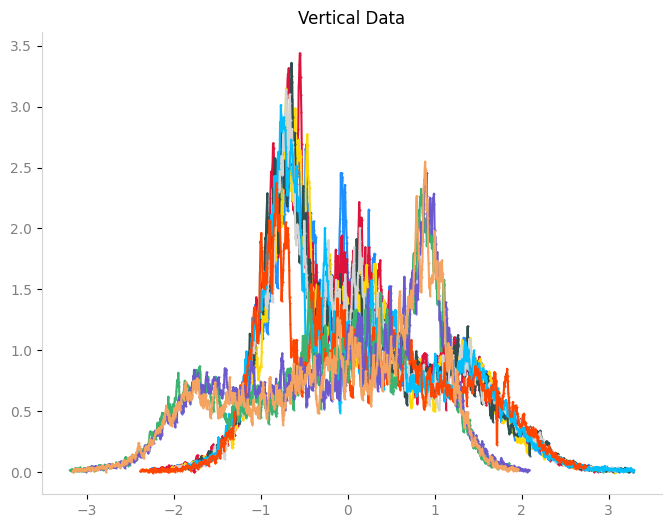

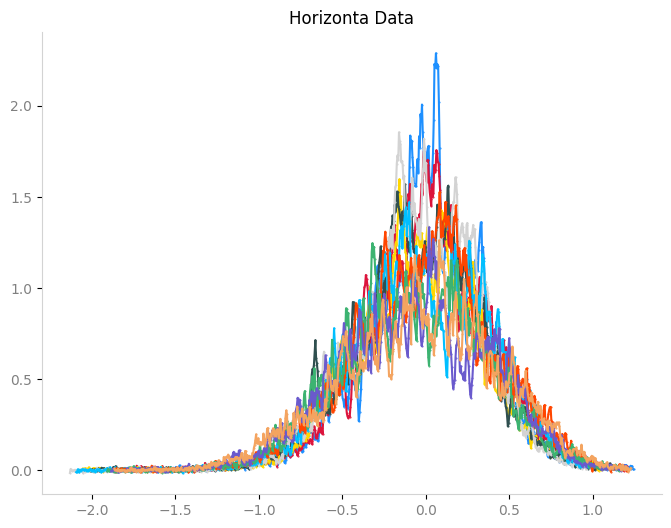

In [ ]:
# What does the data look like?
plt.figure(figsize=(8, 6))
for i in range(10):
  plt.title('Vertical Data')
  minimal_plot(*v_frame_container[i].T,plot_type='plot',marker='.', linestyle='-', color=colors[i], markersize=1, linewidth=1.5,alpha=1,size_x=8,size_y=6,x_label='',y_label='',yerr=None,xerr=None,same_plot=True)
    #plt.plot(*v_frame_container[i].T)
plt.figure(figsize=(8, 6))
for i in range(10):
  plt.title('Horizonta Data')
  minimal_plot(*h_frame_container[i].T,plot_type='plot',marker='.', linestyle='-', color=colors[i], markersize=1, linewidth=1.5,alpha=1,size_x=8,size_y=6,x_label='',y_label='',yerr=None,xerr=None,same_plot=True)
    #plt.plot(*v_frame_container[i].T)

Let's explore the counting staistics.  A bin, or pixel is really a frequency(statistical) measurement for photon, so we're doing poisson statistics.  One neat fact about a poission distribution is that $\sigma^2 = \mu$.  There are also non-poisson background contributions, so we end up with the form
$$ \sigma_{i}^2 = \sigma_{noise}^2 + kA_i$$

We should first check that there really is this sqrt relationship by looking at the data on log-log axes and interpreting the slope.  It should be pretty clearly 0.5.

Now if we want to find $\sigma_{noise}$ we go to where A_i=0 on the curve and calculate $\sigma_{noise}$ then

$$ \sqrt{\sigma_i^2 -\sigma_{noise}^2} = \sqrt{k} \sqrt{A_i} $$

and we can fit k.

In [ ]:
padded_tmp_container = np.zeros(632+30)
padded_tmp_container[15:632+15] = h_frame_container[0][:,1]

In [ ]:
sigma_i = [np.std(padded_tmp_container[i:i+30])**2 for i in range(632)]

Text(0, 0.5, 'intensity')

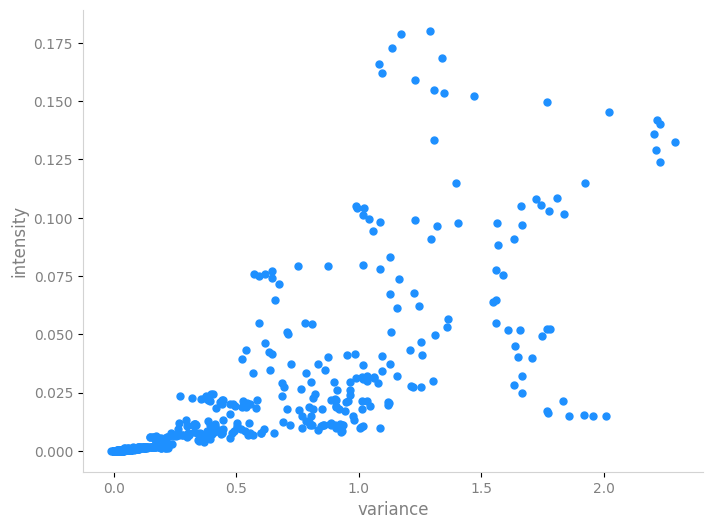

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(h_frame_container[0][:,1], sigma_i, marker='o', linestyle='', color='dodgerblue', markersize=5, linewidth=1.5)

# Customizing the plot for minimalism
plt.gca().spines['top'].set_visible(False)    # Hide the top spine
plt.gca().spines['right'].set_visible(False)  # Hide the right spine
plt.gca().spines['left'].set_color('lightgray')  # Lighten the left spine
plt.gca().spines['bottom'].set_color('lightgray')  # Lighten the bottom spine

# Minimal tick marks and labels
plt.xticks(fontsize=10, color='gray')
plt.yticks(fontsize=10, color='gray')

# Light grid
plt.grid(True, which='both', linestyle='', linewidth=0.5, color='lightgray', axis='y')

# Labels (optional, keep them minimal)
plt.xlabel('variance', fontsize=12, color='gray')
plt.ylabel('intensity', fontsize=12, color='gray')

In [ ]:
sigma_i = np.array(sigma_i)
for i in range(10):
  print('The noise floor variance estimate for values less than {0:.2f} is {1:.3E}.'.format(0.02*(i+1),np.mean(sigma_i[h_frame_container[0][:,1]<0.02*(i+i)])))

The noise floor variance estimate for values less than 0.02 is 5.319E-05.
The noise floor variance estimate for values less than 0.04 is 9.988E-05.
The noise floor variance estimate for values less than 0.06 is 1.869E-04.
The noise floor variance estimate for values less than 0.08 is 2.585E-04.
The noise floor variance estimate for values less than 0.10 is 4.153E-04.
The noise floor variance estimate for values less than 0.12 is 5.819E-04.
The noise floor variance estimate for values less than 0.14 is 7.052E-04.
The noise floor variance estimate for values less than 0.16 is 9.066E-04.
The noise floor variance estimate for values less than 0.18 is 1.032E-03.
The noise floor variance estimate for values less than 0.20 is 1.378E-03.


So there are a couple choice for the noise floor, but It would make sense to take the lowest value provided we aren't sampling less than 30 data points.  A good working estimate is then going to the last ~ 30 points on the left side of variance axis.

In [ ]:
np.sum([h_frame_container[0][:,1]<0.01*(1)]) # number of points we'll use for our average

40

In [ ]:
print('The noise floor variance estimate for values less than {0:.2f} is {1:.3E}.'.format(0.01,np.mean(sigma_i[h_frame_container[0][:,1]<0.01])))

The noise floor variance estimate for values less than 0.01 is 5.956E-05.


Text(0, 0.5, 'intensity')

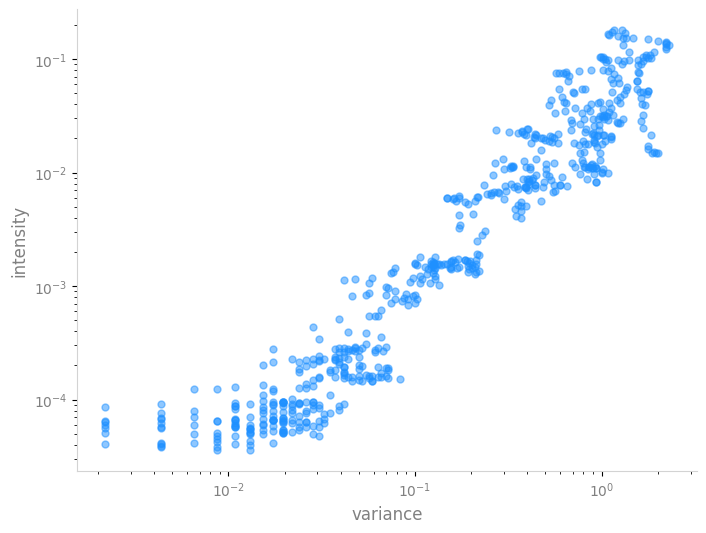

In [ ]:
plt.figure(figsize=(8, 6))
plt.loglog(h_frame_container[0][:,1],sigma_i,marker='o', linestyle='', color='dodgerblue', markersize=5, linewidth=1.5, alpha=0.5)

# Customizing the plot for minimalism
plt.gca().spines['top'].set_visible(False)    # Hide the top spine
plt.gca().spines['right'].set_visible(False)  # Hide the right spine
plt.gca().spines['left'].set_color('lightgray')  # Lighten the left spine
plt.gca().spines['bottom'].set_color('lightgray')  # Lighten the bottom spine

# Minimal tick marks and labels
plt.xticks(fontsize=10, color='gray')
plt.yticks(fontsize=10, color='gray')

# Light grid
plt.grid(True, which='both', linestyle='', linewidth=0.5, color='lightgray', axis='y')
plt.xlabel('variance', fontsize=12, color='gray')
plt.ylabel('intensity', fontsize=12, color='gray')

so if we select $\sigma_{noise}$ to be about $7.7\times10^{-3}$ ($5.96 \times 10^{-5}$ variance)


Text(0, 0.5, 'intensity')

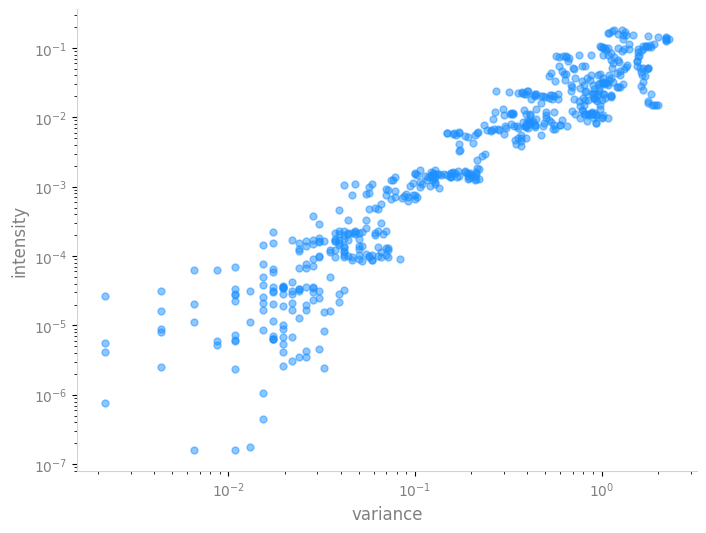

In [ ]:
plt.figure(figsize=(8, 6))
plt.loglog(h_frame_container[0][:,1],np.array(sigma_i)-5.956e-5,marker='o', linestyle='', color='dodgerblue', markersize=5, linewidth=1.5, alpha=0.5)

# Customizing the plot for minimalism
plt.gca().spines['top'].set_visible(False)    # Hide the top spine
plt.gca().spines['right'].set_visible(False)  # Hide the right spine
plt.gca().spines['left'].set_color('lightgray')  # Lighten the left spine
plt.gca().spines['bottom'].set_color('lightgray')  # Lighten the bottom spine

# Minimal tick marks and labels
plt.xticks(fontsize=10, color='gray')
plt.yticks(fontsize=10, color='gray')

# Light grid
plt.grid(True, which='both', linestyle='', linewidth=0.5, color='lightgray', axis='y')
plt.xlabel('variance', fontsize=12, color='gray')
plt.ylabel('intensity', fontsize=12, color='gray')

In [ ]:
m, b = np.polyfit(np.sqrt(np.abs(h_frame_container[0][:,1])), np.sqrt(np.abs(np.array(sigma_i)-5.956e-5)), 1)

In [ ]:
m,b

(0.226633133977462, -0.030984979051923413)

In [ ]:
'so {0:.4} is k'.format((m)**2)

'so 0.05136 is k'

Approximately we have

$$ \sigma_i^2 = 5.956\times 10^{-5} + 0.05136A_i $$

Text(0, 0.5, 'intensity')

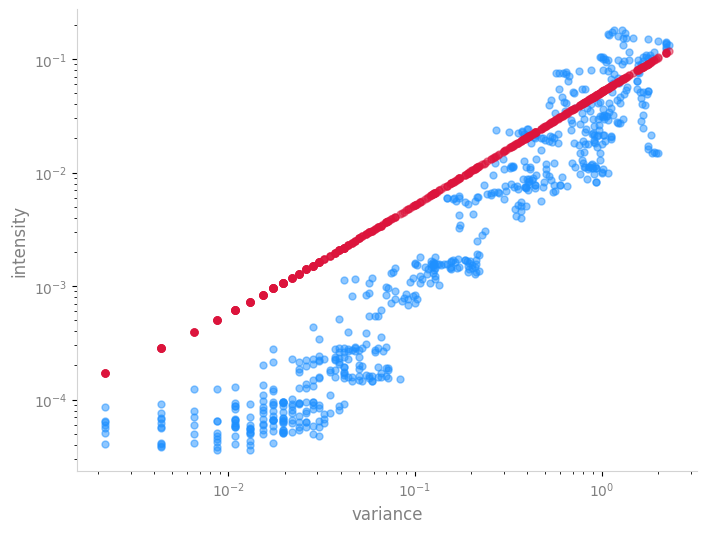

In [ ]:
plt.figure(figsize=(8, 6))
plt.loglog(h_frame_container[0][:,1],np.array(sigma_i),marker='o', linestyle='', color='dodgerblue', markersize=5, linewidth=1.5, alpha=0.5)
plt.loglog(h_frame_container[0][:,1],0.05136*h_frame_container[0][:,1]+5.956e-5,marker='o', linestyle='', color='crimson', markersize=5, linewidth=1.5, alpha=0.5)

# Customizing the plot for minimalism
plt.gca().spines['top'].set_visible(False)    # Hide the top spine
plt.gca().spines['right'].set_visible(False)  # Hide the right spine
plt.gca().spines['left'].set_color('lightgray')  # Lighten the left spine
plt.gca().spines['bottom'].set_color('lightgray')  # Lighten the bottom spine

# Minimal tick marks and labels
plt.xticks(fontsize=10, color='gray')
plt.yticks(fontsize=10, color='gray')

# Light grid
plt.grid(True, which='both', linestyle='', linewidth=0.5, color='lightgray', axis='y')
plt.xlabel('variance', fontsize=12, color='gray')
plt.ylabel('intensity', fontsize=12, color='gray')

Not the most exciting, but note that this was the best fit found. It's an early indicator that we haven't fully characterized all of the error in our experiment.  Let's just see what fit we get from simply using data itself -- as in the blue dot variances calculated with padding

In [ ]:
def waist_profile(M,w_0,x):
    return w_0*(1+M**4*(_lambda*x/(pi*(w_0)**2))**2)**.5

def waist_profile_residual(p,x,t):
    M,w_0 = p
    sim = waist_profile(M,w_0,x)
    return t-sim

def gaussian(A_0,w,x_0,x):
    return A_0*np.exp(-2*(x-x_0)**2/(w**2))

def gaussian_chi_residual(p,x,t,stds):
    A_0,w,x_0 = p
    sim = gaussian(A_0,w,x_0,x)
    return (t-sim)/np.sqrt(stds)
def chi_loss(z):
  return z**2

In [ ]:
h_frame_container[0].shape

(632, 2)

In [ ]:
# Import data from notebook or transcribe
x_h = [2.236,2.231,2.241,2.246,2.251,1.892,1.887,1.882,1.877,1.872]
x_v = [2.471,2.466,2.461,2.456,2.451,2.372,2.377,2.382,2.387,2.392]

In [ ]:
from scipy.optimize import least_squares
from scipy.optimize import curve_fit

In [ ]:
fit_gauss_h_lq = least_squares(gaussian_chi_residual,[1,1,1], args=(h_frame_container[0].T[0],h_frame_container[0].T[1],sigma_i))

In [ ]:
fit_gauss_h_lq

     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 1.322e+00  2.109e+00 ...  6.671e-01  3.026e-01]
           x: [ 1.230e+00 -7.274e-01 -1.133e-02]
        cost: 608.059191738177
         jac: [[-1.971e-02  5.826e-01  2.786e-01]
               [-2.054e-02  6.037e-01  2.896e-01]
               ...
               [-2.375e-01  4.750e+00 -2.762e+00]
               [-2.334e-01  4.701e+00 -2.724e+00]]
        grad: [ 1.627e-06 -6.851e-02 -2.091e-02]
  optimality: 0.06850631006484775
 active_mask: [ 0.000e+00  0.000e+00  0.000e+00]
        nfev: 33
        njev: 28

In [ ]:
# if we want to use curve fit, but it less clearly extracts the chi-squared fit values we want
#fit_gauss_h = curve_fit(gaussian,h_frame_container[0].T[0],h_frame_container[0].T[1],p0=[1,1,1], simga=sigma_i )

Check the solution

Text(0, 0.5, 'intensity')

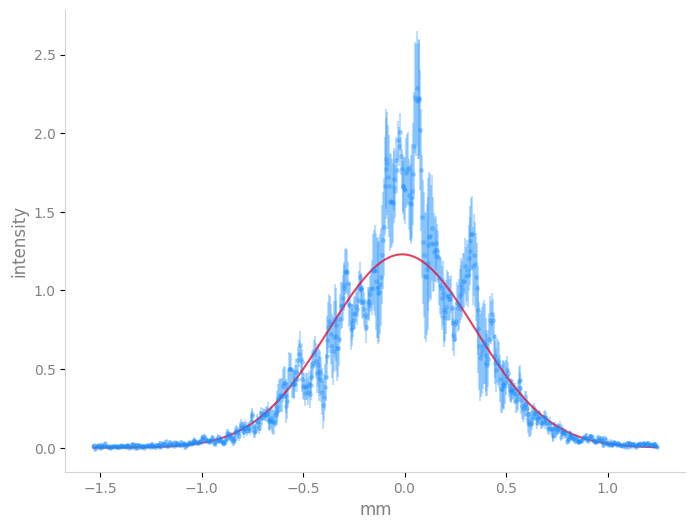

In [ ]:
plt.figure(figsize=(8, 6))

plt.errorbar(h_frame_container[0].T[0],h_frame_container[0].T[1],marker='.', linestyle='', color='dodgerblue', markersize=5, linewidth=1.5,alpha=0.3,yerr=np.sqrt(sigma_i))
plt.plot(h_frame_container[0].T[0],gaussian(*fit_gauss_h_lq["x"],h_frame_container[0].T[0]),marker='', linestyle='-', color='crimson', markersize=5, linewidth=1.5,alpha=0.8)

# Customizing the plot for minimalism
plt.gca().spines['top'].set_visible(False)    # Hide the top spine
plt.gca().spines['right'].set_visible(False)  # Hide the right spine
plt.gca().spines['left'].set_color('lightgray')  # Lighten the left spine
plt.gca().spines['bottom'].set_color('lightgray')  # Lighten the bottom spine

# Minimal tick marks and labels
plt.xticks(fontsize=10, color='gray')
plt.yticks(fontsize=10, color='gray')

# Light grid
plt.grid(True, which='both', linestyle='', linewidth=0.5, color='lightgray', axis='y')
plt.xlabel('mm', fontsize=12, color='gray')
plt.ylabel('intensity', fontsize=12, color='gray')



Now if we use least_squares this way, the cost function will just be a sample from our chi-squared distribution given the 632 degrees of freedom from the horizontal bins.

In [ ]:
cost = fit_gauss_h_lq['cost']

Text(0, 0.5, 'p')

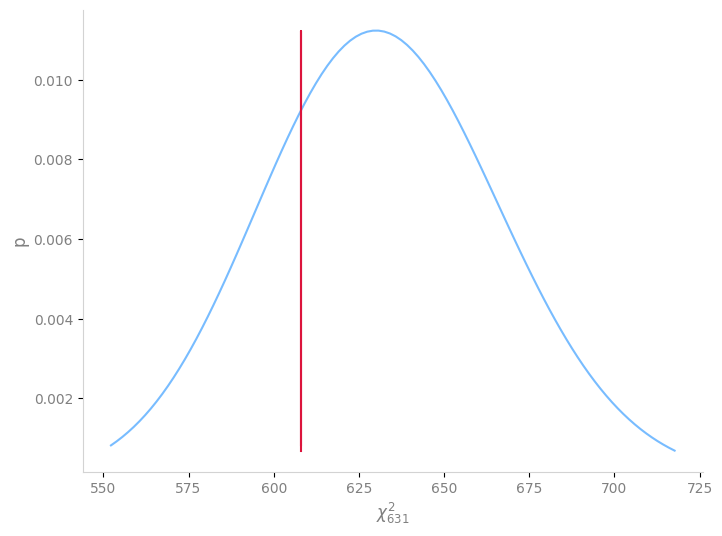

In [ ]:
from scipy.stats import chi2
df = 632
rv = chi2(df)
x = np.linspace(chi2.ppf(0.01, df),
                chi2.ppf(0.99, df), 100)

plt.figure(figsize=(8, 6))

plt.plot(x, chi2.pdf(x, df), alpha=0.6, label='chi2 pdf', marker='', linestyle='-', color='dodgerblue', markersize=5, linewidth=1.5)
plt.plot(cost*np.ones(100),chi2.pdf(x, df),marker='', linestyle='-', color='crimson', markersize=5, linewidth=1.5)

# Customizing the plot for minimalism
plt.gca().spines['top'].set_visible(False)    # Hide the top spine
plt.gca().spines['right'].set_visible(False)  # Hide the right spine
plt.gca().spines['left'].set_color('lightgray')  # Lighten the left spine
plt.gca().spines['bottom'].set_color('lightgray')  # Lighten the bottom spine

# Minimal tick marks and labels
plt.xticks(fontsize=10, color='gray')
plt.yticks(fontsize=10, color='gray')

# Light grid
plt.grid(True, which='both', linestyle='', linewidth=0.5, color='lightgray', axis='y')
plt.xlabel('$\chi_{631}^{2}$', fontsize=12, color='gray')
plt.ylabel('p', fontsize=12, color='gray')





This tells us that our gaussian model gives a somewhat reasonable result although it looks like it's overfitting because this chi-squared really is the simplest model.  If we really get it correct we would expect to sample right around the average value of the distribution in red because we're averaging the value of the cost function over iterations of the fit.  

Where does this overfitting come from then if we're just using the variance data itself?  Well, for one, we used a scheme for prediciting the variance which was based on padding the exterior of the signal with 0s.  Because of this we can tell the variance estimates close to the noise floor aren't correct -- they have this sort of aliasing associated with them. That only does so much though.  The other culprit with these optimization algorithms relate to the hyperparameters we use in the fitting.  Least_squares let's us use different methods, 'dogbox', 'trf', and 'lm' as well as different step sizes and intial guesses for the parameters, etc.  

We can also compute the reduced chi-squared which is nice because it gives us more information. It's just

$$ \chi_{\nu}^2 = \chi^2/\nu $$

where $\nu = n-m$ the number of degrees of freedom, 631 in this case, minus the number of parameters.

In [ ]:
reduced_chi_sq = cost/(632-1-2)
reduced_chi_sq

0.9667077770082305

This more explicitly explains the concept since we typically see in textbooks $\chi^2_{\nu} >> 1$ explains poor model, $\chi^2_{\nu} > 1$ underestimating error and not fully getting the model picture correct,  $\chi^2_{\nu}=1$ means the fit is good, and $\chi^2_{\nu}< 1 $ indicates an overfitting of the data or overestimation of the error.  

That's cool but maybe our model we've built based on poisson statistics will do better.

Text(0, 0.5, 'intensity')

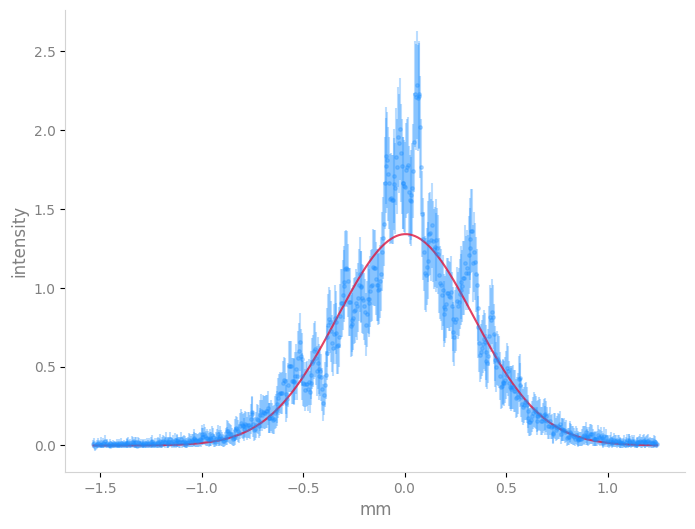

In [ ]:
fit_gauss_h_lsq_poisson = least_squares(gaussian_chi_residual,[1,1,1], args=(h_frame_container[0].T[0],h_frame_container[0].T[1],np.abs(0.05136*h_frame_container[0][:,1]+5.956e-5)))

plt.figure(figsize=(8, 6))

plt.errorbar(h_frame_container[0].T[0],h_frame_container[0].T[1],marker='.', linestyle='', color='dodgerblue', markersize=5, linewidth=1.5,alpha=0.3,yerr=np.sqrt(np.abs(0.05136*h_frame_container[0][:,1]+5.956e-5)))
plt.plot(h_frame_container[0].T[0],gaussian(*fit_gauss_h_lsq_poisson["x"],h_frame_container[0].T[0]),marker='', linestyle='-', color='crimson', markersize=5, linewidth=1.5,alpha=0.8)

# Customizing the plot for minimalism
plt.gca().spines['top'].set_visible(False)    # Hide the top spine
plt.gca().spines['right'].set_visible(False)  # Hide the right spine
plt.gca().spines['left'].set_color('lightgray')  # Lighten the left spine
plt.gca().spines['bottom'].set_color('lightgray')  # Lighten the bottom spine

# Minimal tick marks and labels
plt.xticks(fontsize=10, color='gray')
plt.yticks(fontsize=10, color='gray')

# Light grid
plt.grid(True, which='both', linestyle='', linewidth=0.5, color='lightgray', axis='y')
plt.xlabel('mm', fontsize=12, color='gray')
plt.ylabel('intensity', fontsize=12, color='gray')



reduce chi-squared is 0.2742


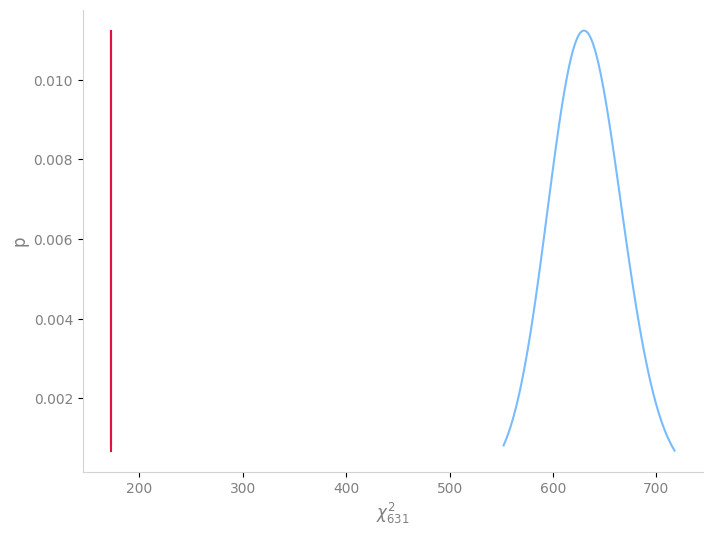

In [ ]:
cost = fit_gauss_h_lsq_poisson['cost']
df = 632
rv = chi2(df)
x = np.linspace(chi2.ppf(0.01, df),
                chi2.ppf(0.99, df), 100)

plt.figure(figsize=(8, 6))

plt.plot(x, chi2.pdf(x, df), alpha=0.6, label='chi2 pdf', marker='', linestyle='-', color='dodgerblue', markersize=5, linewidth=1.5)
plt.plot(cost*np.ones(100),chi2.pdf(x, df),marker='', linestyle='-', color='crimson', markersize=5, linewidth=1.5)

# Customizing the plot for minimalism
plt.gca().spines['top'].set_visible(False)    # Hide the top spine
plt.gca().spines['right'].set_visible(False)  # Hide the right spine
plt.gca().spines['left'].set_color('lightgray')  # Lighten the left spine
plt.gca().spines['bottom'].set_color('lightgray')  # Lighten the bottom spine

# Minimal tick marks and labels
plt.xticks(fontsize=10, color='gray')
plt.yticks(fontsize=10, color='gray')

# Light grid
plt.grid(True, which='both', linestyle='', linewidth=0.5, color='lightgray', axis='y')
plt.xlabel('$\chi_{631}^{2}$', fontsize=12, color='gray')
plt.ylabel('p', fontsize=12, color='gray')

reduced_chi_sq = cost/(632-1-2)
print("reduce chi-squared is {:.4}".format(reduced_chi_sq))

This overfits even worse.  The description of the error is far too simplistic which we saw in our initial fit using $\sigma^2 = \sigma^2_{noise} + k A$.

Now going back to the original estimate but focusing on the algorithms hyper parameters:

Text(0, 0.5, 'intensity')

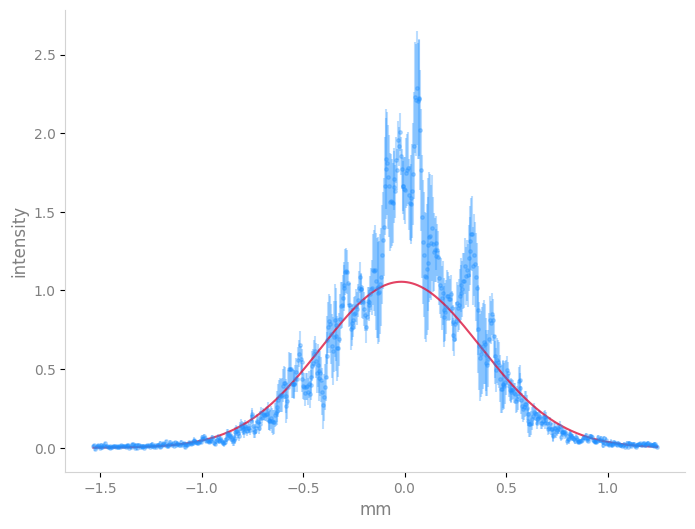

In [ ]:
fit_gauss_h_lq = least_squares(gaussian_chi_residual,[1,1,1], args=(h_frame_container[0].T[0],h_frame_container[0].T[1],sigma_i),diff_step=1)

plt.figure(figsize=(8, 6))

plt.errorbar(h_frame_container[0].T[0],h_frame_container[0].T[1],marker='.', linestyle='', color='dodgerblue', markersize=5, linewidth=1.5,alpha=0.3,yerr=np.sqrt(sigma_i))
plt.plot(h_frame_container[0].T[0],gaussian(*fit_gauss_h_lq["x"],h_frame_container[0].T[0]),marker='', linestyle='-', color='crimson', markersize=5, linewidth=1.5,alpha=0.8)

# Customizing the plot for minimalism
plt.gca().spines['top'].set_visible(False)    # Hide the top spine
plt.gca().spines['right'].set_visible(False)  # Hide the right spine
plt.gca().spines['left'].set_color('lightgray')  # Lighten the left spine
plt.gca().spines['bottom'].set_color('lightgray')  # Lighten the bottom spine

# Minimal tick marks and labels
plt.xticks(fontsize=10, color='gray')
plt.yticks(fontsize=10, color='gray')

# Light grid
plt.grid(True, which='both', linestyle='', linewidth=0.5, color='lightgray', axis='y')
plt.xlabel('mm', fontsize=12, color='gray')
plt.ylabel('intensity', fontsize=12, color='gray')

reduce chi-squared is 1.149


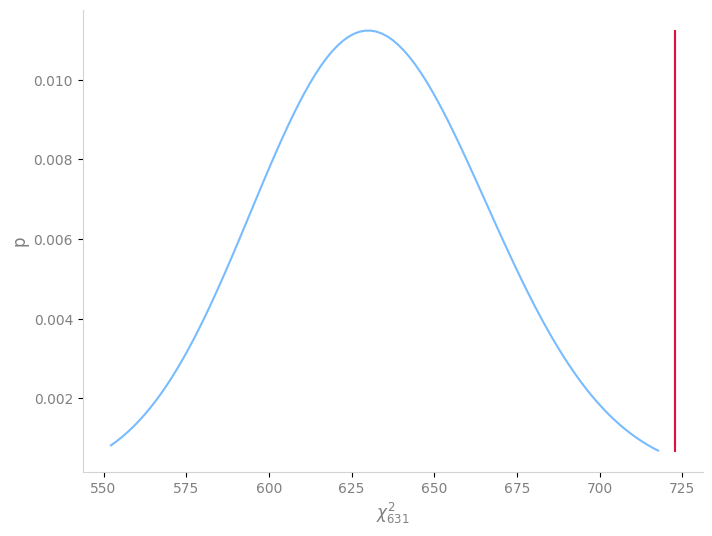

In [ ]:
cost = fit_gauss_h_lq['cost']
df = 632
rv = chi2(df)
x = np.linspace(chi2.ppf(0.01, df),
                chi2.ppf(0.99, df), 100)

plt.figure(figsize=(8, 6))

plt.plot(x, chi2.pdf(x, df), alpha=0.6, label='chi2 pdf', marker='', linestyle='-', color='dodgerblue', markersize=5, linewidth=1.5)
plt.plot(cost*np.ones(100),chi2.pdf(x, df),marker='', linestyle='-', color='crimson', markersize=5, linewidth=1.5)

# Customizing the plot for minimalism
plt.gca().spines['top'].set_visible(False)    # Hide the top spine
plt.gca().spines['right'].set_visible(False)  # Hide the right spine
plt.gca().spines['left'].set_color('lightgray')  # Lighten the left spine
plt.gca().spines['bottom'].set_color('lightgray')  # Lighten the bottom spine

# Minimal tick marks and labels
plt.xticks(fontsize=10, color='gray')
plt.yticks(fontsize=10, color='gray')

# Light grid
plt.grid(True, which='both', linestyle='', linewidth=0.5, color='lightgray', axis='y')
plt.xlabel('$\chi_{631}^{2}$', fontsize=12, color='gray')
plt.ylabel('p', fontsize=12, color='gray')


reduced_chi_sq = cost/(632-1-2)
print("reduce chi-squared is {:.4}".format(reduced_chi_sq))

This seems more realistic eventhough the curve looks like it fits the data worse, in this form we realize just how non-gaussian the data is based on the noise and the shape.  We use this to understand what experiments and analysis we can design to better model our beam.

In [ ]:
def fit_harness(corrected_hframe_container,corrected_vframe_container):

    waist_container_h = []
    center_container_h = []
    amplitude_container_h = []
    waist_container_v = []
    center_container_v = []
    amplitude_container_v = []
    lsq_fit_container_h = []
    lsq_fit_container_v = []
    #x_v_proj_profile_container =  np.zeros((2,5,997))

    for i in range(10):
        l_h, h_profile = h_frame_container[i].T
        h_profile = h_profile - np.mean(np.hstack((h_profile[:15],h_profile[-15:]))) # remove DC offset
        #h_profile = np.where(h_profile<1e-3,0,h_profile) # remove noise floor
        sigma_i_h = get_sigma(h_profile)
        p_0_gauss_h = [1,1,1]
        #p_0_gauss_h = [h_profile[len(h_profile)//2],abs(l_h[len(l_h)//2]-l_h[0]),l_h[len(l_h)//2]]
        fit_gauss_h_lsq= least_squares(gaussian_chi_residual,p_0_gauss_h, args=(l_h,h_profile,sigma_i_h),diff_step=(.1))
        lsq_fit_container_h.append(fit_gauss_h_lsq)
        fit_ps_h = fit_gauss_h_lsq['x']
        waist_container_h.append(fit_ps_h[1])
        center_container_h.append(fit_ps_h[2])
        amplitude_container_h.append(fit_ps_h[0])

        l_v, v_profile = v_frame_container[i].T
        v_profile = v_profile - np.mean(np.hstack((v_profile[:15],v_profile[-15:]))) # remove DC offset
        #v_profile = np.where(v_profile<1e-3,0,v_profile) # remove noise floor
        sigma_i_v = get_sigma(v_profile)
        p_0_gauss_v = [1,1,1]
        fit_gauss_v_lsq= least_squares(gaussian_chi_residual,p_0_gauss_v, args=(l_v,v_profile,sigma_i_v),diff_step=(.1))
        lsq_fit_container_v.append(fit_gauss_v_lsq)
        fit_ps_v = fit_gauss_v_lsq['x']
        waist_container_v.append(fit_ps_v[1])
        center_container_v.append(fit_ps_v[2])
        amplitude_container_v.append(fit_ps_v[0])
    return waist_container_h, center_container_h, amplitude_container_h, waist_container_v, center_container_v,   amplitude_container_v, lsq_fit_container_h,lsq_fit_container_v

#     for i in range(2):
#         for j in range(5):
#             corrected_hframe = corrected_hframe_container[i][j]
#             x_proj_h = np.sum(corrected_hframe,axis=1)
#             max_index_h = np.argmax(x_proj_h)
#             target_gauss_h = corrected_hframe[max_index_h]
#             target_gauss_h = target_gauss_h-np.mean(target_gauss_h[target_gauss_h<20])
#             p_0_gauss_h = np.array([700,400*pixel_width_h,600*pixel_width_h])
#             l_h = np.arange(corrected_hframe.shape[1])*pixel_width_h
#             pfit_gauss_h, pcov_gauss_h = leastsq(gaussian_residual,p_0_gauss_h, args=(l_h,target_gauss_h),full_output=1)[:2]
#             waist_container_h.append(pfit_gauss_h[1])
#             center_container_h.append(pfit_gauss_h[2])
#             amplitude_contaner_h.append(pfit_gauss_h[0])

#             corrected_vframe = corrected_vframe_container[i][j]
#             x_proj_v = np.sum(corrected_vframe,axis=0)
#             max_index_v = np.argmax(x_proj_v)
#             target_gauss_v = corrected_vframe[:,max_index_v]
#             #target_gauss_v = target_gauss_v - np.mean(target_gauss_v[target_gauss_v<20])
#             p_0_gauss_v = np.array([700,1000*pixel_width_h,600*pixel_width_h])
#             l_v = np.arange(corrected_vframe.shape[0])*pixel_width_v
#             pfit_gauss_v, pcov_gauss_v = leastsq(gaussian_residual,p_0_gauss_v, args=(l_v,target_gauss_v),full_output=1)[:2]
#             waist_container_v.append(pfit_gauss_v[1])
#             center_container_v.append(pfit_gauss_v[2])
#             amplitude_contaner_v.append(pfit_gauss_v[0])


def get_sigma(h_profile):
  n = len(h_profile)
  padded_tmp_container = np.zeros(n+30)
  padded_tmp_container[15:n+15] = h_profile
  return [np.std(padded_tmp_container[i:i+30])**2 for i in range(n)]



In [ ]:
waist_container_h, center_container_h, amplitude_container_h, waist_container_v, center_container_v, amplitude_container_v, lsq_fit_container_h,lsq_fit_container_v = fit_harness(h_frame_container,v_frame_container)

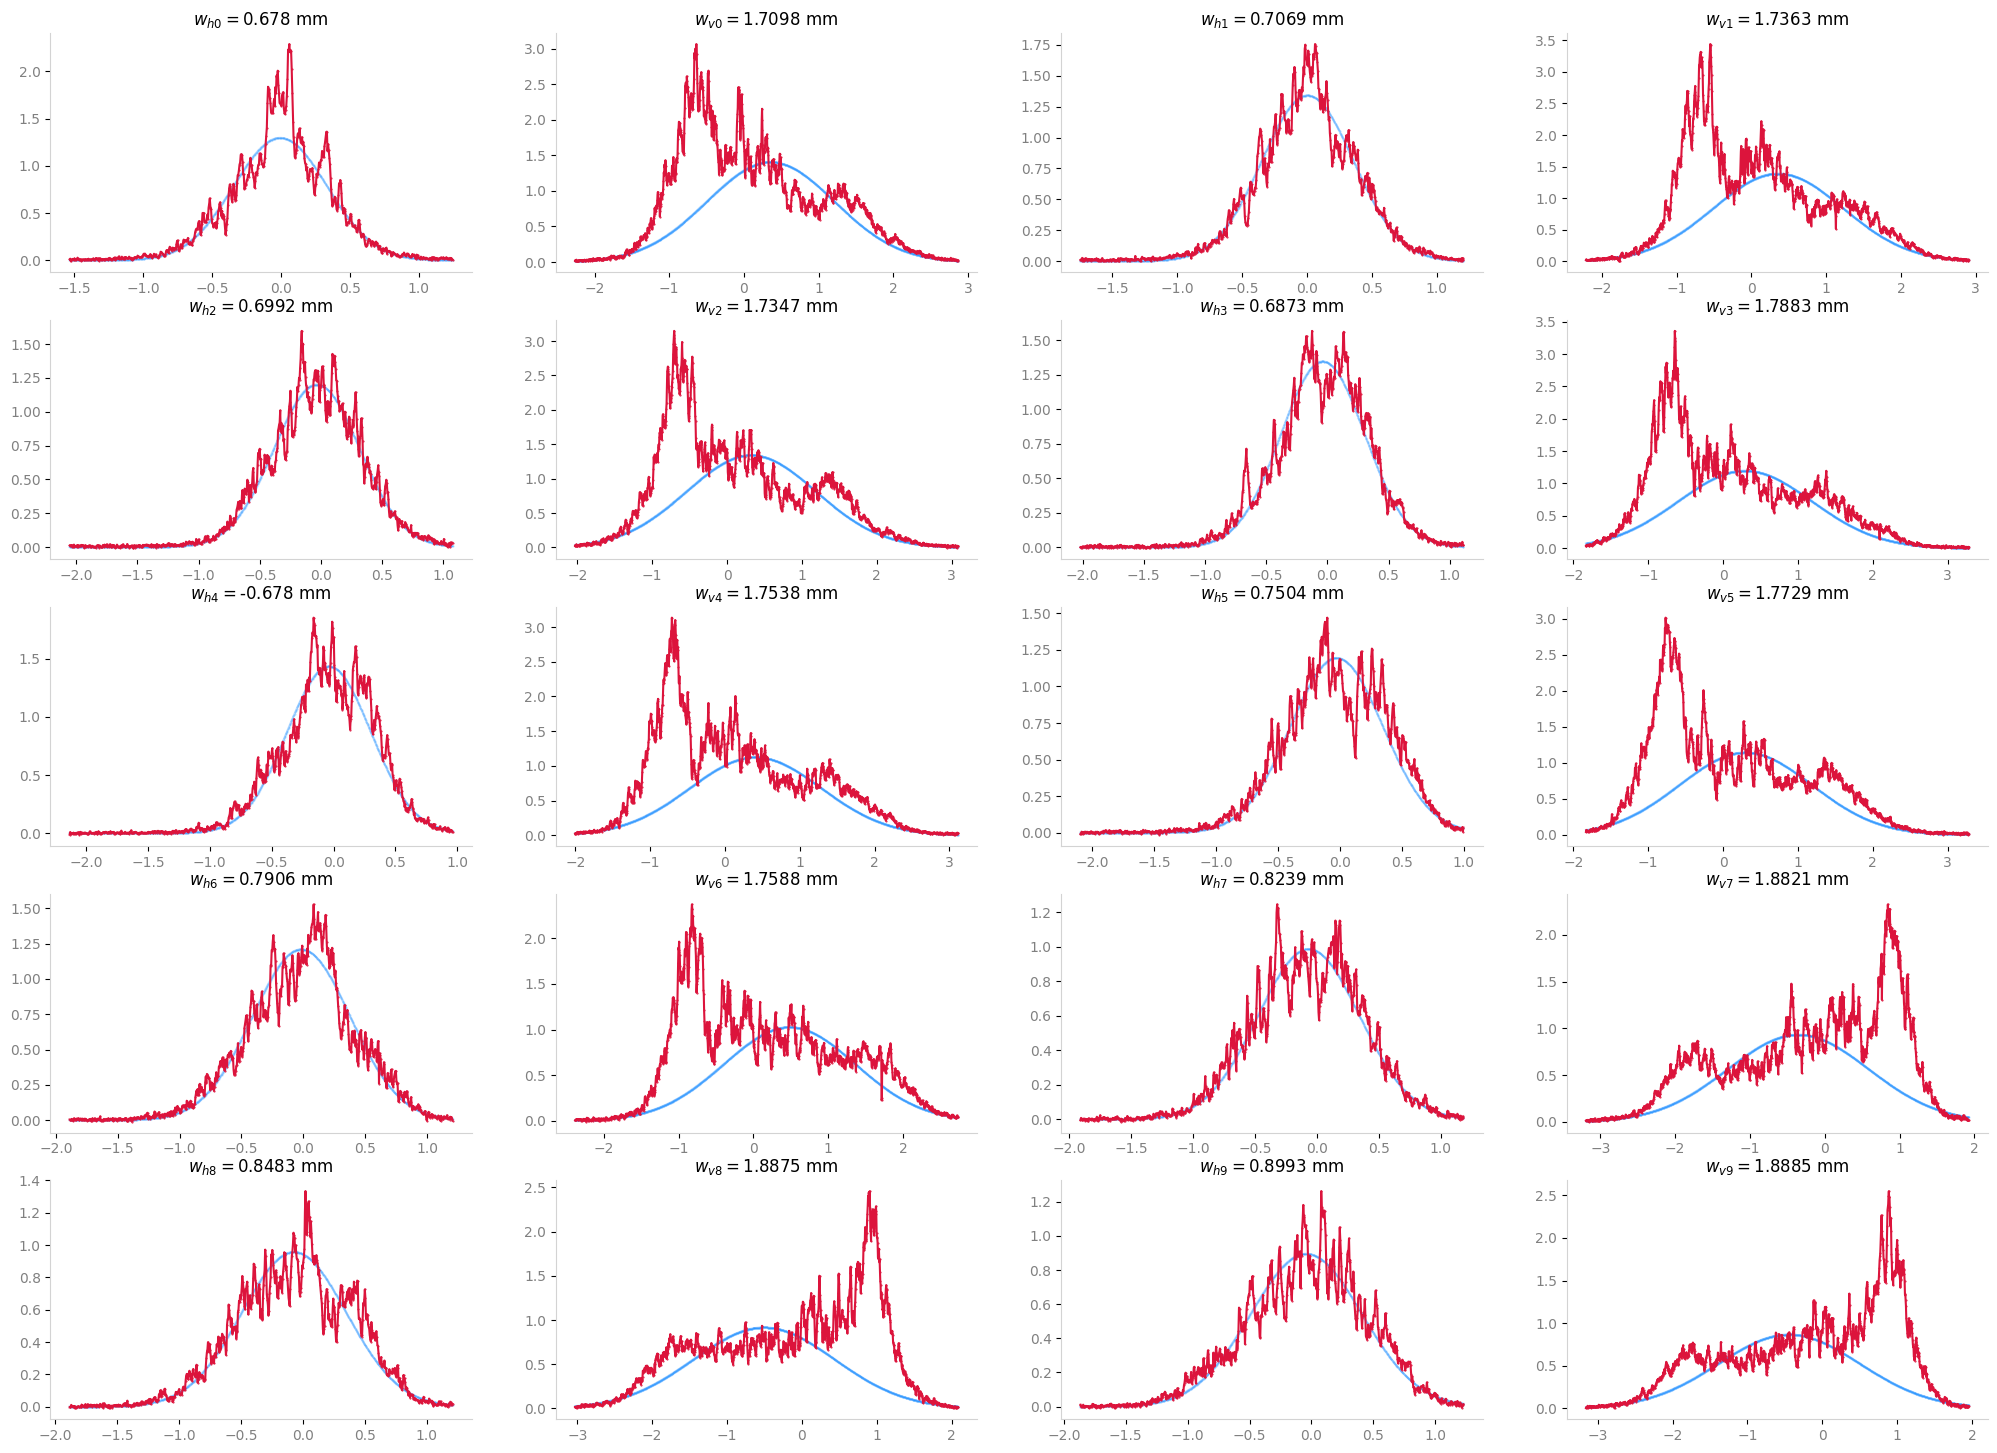

In [ ]:
plt.figure(figsize=(25,18))
for i in range(10):
    plt.subplot(5,4,2*(i)+1)
    plt.title('$w_{h'+str(i)+'} = $' + str(np.round(waist_container_h[i],4)) + ' mm')
    minimal_plot(h_frame_container[i].T[0],gaussian(np.abs(amplitude_container_h[i]),waist_container_h[i],center_container_h[i],h_frame_container[i].T[0]),plot_type='plot',marker='.', linestyle='-', color=colors[0], markersize=1, linewidth=1.5,alpha=.3,size_x=8,size_y=6,x_label='',y_label='',yerr=None,xerr=None,same_plot=True)
    minimal_plot(*h_frame_container[i].T,plot_type='plot',marker='.', linestyle='-', color=colors[1], markersize=1, linewidth=1.5,alpha=1,size_x=8,size_y=6,x_label='',y_label='',yerr=None,xerr=None,same_plot=True)
    plt.subplot(5,4,2*i+1+1)
    plt.title('$w_{v'+str(i)+'} = $' + str(np.round(waist_container_v[i],4))+' mm')
    minimal_plot(v_frame_container[i].T[0],gaussian(np.abs(amplitude_container_v[i]),waist_container_v[i],center_container_v[i],v_frame_container[i].T[0]),plot_type='plot',marker='.', linestyle='-', color=colors[0], markersize=1, linewidth=1.5,alpha=.3,size_x=8,size_y=6,x_label='',y_label='',yerr=None,xerr=None,same_plot=True)
    minimal_plot(*v_frame_container[i].T,plot_type='plot',marker='.', linestyle='-', color=colors[1], markersize=1, linewidth=1.5,alpha=1,size_x=8,size_y=6,x_label='',y_label='',yerr=None,xerr=None,same_plot=True)

Text(0, 0.5, 'mm')

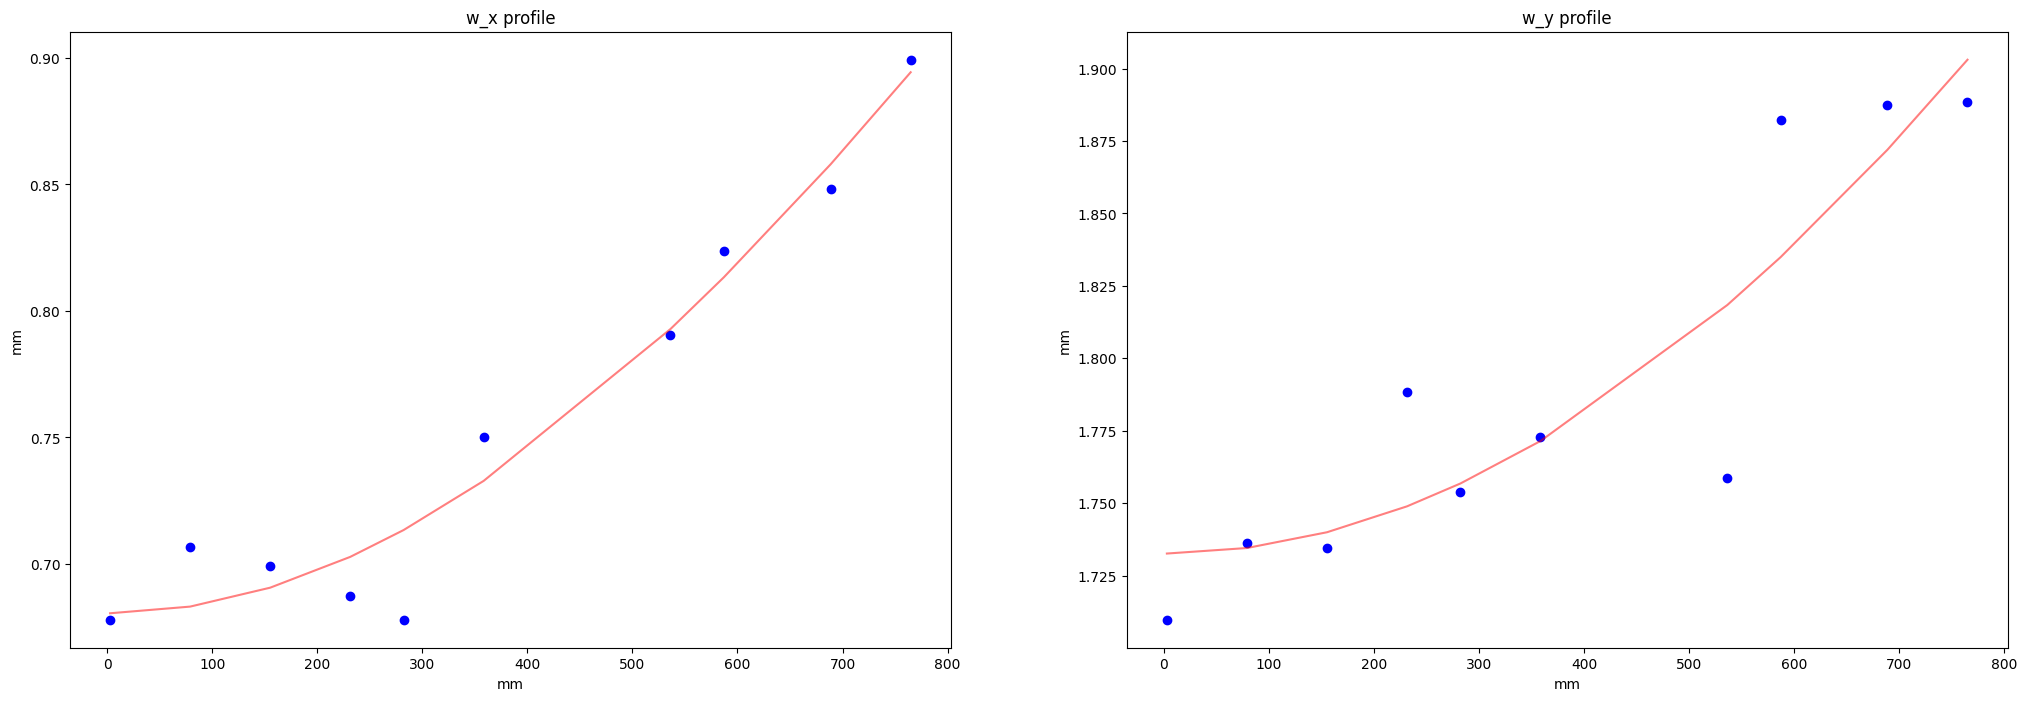

In [ ]:
target_waist_container_h =  []
target_waist_container_v = []
plt.figure(figsize=(25,8))
l = 9.44
d = 2000 - 25.4*(np.array([56,53,50,47,45,42,35,33,29,26]) + (23-l/25.4)*np.ones(10))

#for k in range(30):
#corrected_hframe_container, corrected_vframe_container = frame_grab(k,'_2023_11_10.mp4')
waist_container_h, center_container_h, amplitude_contaner_h, waist_container_v, center_container_v, amplitude_contaner_v, lsq_fit_container_h, lsq_fit_container_v = fit_harness(h_frame_container,v_frame_container)
#plt.plot(gaussian(amplitude_contaner_h[5*0+i],waist_container_h[5*0+i],center_container_h[5*0+i],l_h),list(mcolors.TABLEAU_COLORS)[5*0+i])
target_waist_h = np.abs(waist_container_h) # beam star csv gives cm^-2 for amplitude and mm for abscissa
p_0_waist_h = np.array([1,76e-3])
pfit_waist_h,pcov_waist_h = leastsq(waist_profile_residual,p_0_waist_h,args=(np.array(d),target_waist_h),full_output=1)[:2]

target_waist_v = np.abs(waist_container_v)
target_waist_container_v.append(target_waist_v)
p_0_waist_v = np.array([45.1006487, 0.00186467848])
pfit_waist_v,pcov_waist_v = leastsq(waist_profile_residual,p_0_waist_v,args=(np.array(d),target_waist_v),full_output=1)[:2]

plt.subplot(1,2,1)
plt.title("w_x profile")
plt.plot(d,target_waist_h,'bo')
#plt.plot(2.5-np.array(x_h),target_waist_h,'bo')
#plt.plot(2.5-np.array(x_h),waist_profile(*pfit_waist_h,2.5-np.array(x_h)),'r',alpha=.05)
plt.plot(d,waist_profile(*pfit_waist_h,d),'r',alpha=.5)
plt.xlabel('mm')
plt.ylabel('mm')
  #[0]*np.ones(len(x)),pfit_waist[1]*np.ones(len(x))
plt.subplot(1,2,2)
plt.title("w_y profile")
#plt.plot(2.5-np.array(x_v),target_waist_v,'bo')
#plt.plot(2.5-np.array(x_v),waist_profile(*pfit_waist_v,2.5-np.array(x_v)),'r',alpha=.05)
plt.plot(d,target_waist_v,'bo')
plt.plot(d,waist_profile(*pfit_waist_v,d),'r',alpha=.5)
plt.xlabel('mm')
plt.ylabel('mm')

In [ ]:


print("M_x = {0:.4f} and w_{{0x}} = {1:.4E} mm".format(pfit_waist_h[0],pfit_waist_h[1]))
print("M_y = {0:.4} and w_{{0y}} = {1:.4E} mm".format(*pfit_waist_v))

M_x = 2.1940 and w_{0x} = 6.8051E-01 mm
M_y = 4.077 and w_{0y} = 1.7326E+00 mm


In [ ]:
v_shapes = [v_frame_container[i].T[0].shape[0] for i in range(10)]
h_shapes = [h_frame_container[i].T[0].shape[0] for i in range(10)]

In [ ]:
reduced_chi_sqs_v = [lsq_fit['cost']/(v_shapes[i]-1-2) for i,lsq_fit in enumerate(lsq_fit_container_v)]
reduced_chi_sqs_v

[5.243857756209415,
 3.6357292024385233,
 5.233303263399116,
 4.168377951537584,
 6.008978791567883,
 7.009488695025786,
 4.070271757308807,
 6.827936061284385,
 5.8632567675704035,
 5.388020890395083]

In [ ]:
h_frame_container[5].T[0].shape[0]

704

In [ ]:
reduced_chi_sqs_h = [lsq_fit['cost']/(h_shapes[i]-1-2) for i,lsq_fit in enumerate(lsq_fit_container_h)]
reduced_chi_sqs_h

[0.7223164407236107,
 0.566557430065115,
 0.5879672607762152,
 0.7059927621984097,
 0.9796719728112179,
 1.0278041565437863,
 0.8503118839558947,
 0.6540523740929837,
 0.8601447113628209,
 0.7850107913151063]

It's actually not clear this is proper overfitting because the results should more reasonably follow the quadratic curve even if they aren't gaussian exactly.  It might be due to the fact that we're not subtracting the noise floor.  That being said, it could also be that since we're only interested with estimating the width of the gaussian, exact curve fitting gives us redundant clues about the quality of data and in doing so hinders our performance at estimating this value.

 In essence, all we want is the second moment, which would be better found using statistical methods.  For instance, letting the instensity profile form a distribution

$$ f_I = \frac{1}{\sum_{i}^N I_i \Delta l_i} I_i $$

which in principle after normalization should approximately look like

$$ f_I(l_i) =  \frac{\sqrt{2}}{\sqrt{\pi \omega_{0}^2}} \exp\bigg\{ \frac{-2(l_i-\mu)^2}{\omega_0^2} \bigg\} $$.

Now based on the fact that

$$ \mathcal{N}(\mu,\sigma) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\bigg\{ \frac{-(x-\mu)^2}{2\sigma^2} \bigg\} $$

we get that the

$$ \mathrm{Var}(L) = \frac{\omega_0^2}{4}, $$

so our calculation becomes

$$ \omega_0 = 2\sqrt{\mathrm{Var}(L)} = 2\sqrt{\big\langle (L-\mu_L)^2 \big\rangle_{f_I}}$$

Which is relatively clear in the discrete case. However, the error of this process lies in the fact that the distribution is noisy, and direct integration isn't very stable for discontinuities.  It is therefore hard to characterize the error in the estimation of the variance.  We could get it from the $\sigma_i$ values we calculated for the $\chi^2$ fittin in first place.  In such a case, we can do classic error analysis give the fact that we have a simple analytic function and we know every $\delta I_i$ with $\delta l_i$ being uniform and negligable.  In particular

$$ \delta  \big\langle (L-\mu_L)^2 \big\rangle_{f_I} =  \sum_i^N \frac{\partial}{\partial I_i}\big\langle (L-\mu_L)^2 \big\rangle_{f_I} $$


In [ ]:
import numpy as np
from scipy.interpolate import interp1d

In [ ]:
stds_container_h = []
stds_container_h_se = []
stds_container_v = []
stds_container_v_se = []

for i in range(10):
  estimate_container_h = []
  estimate_container_v = []
  # average 30 samples for a good estimate of t
  for j in range(30):
    profile_h = h_frame_container[i].T[1]
    cumulative_h = np.cumsum(profile_h/np.sum(profile_h))
    cumulative_h -= cumulative_h.min()
    f_h = interp1d(cumulative_h/cumulative_h.max(), h_frame_container[i].T[0])
    samples_h = f_h(np.random.random(100000))
    estimate_container_h.append(2*np.std(samples_h)**.5)
    profile_v = v_frame_container[i].T[1]
    cumulative_v = np.cumsum(profile_v/np.sum(profile_v))
    cumulative_v -= cumulative_v.min()
    f_v = interp1d(cumulative_v/cumulative_v.max(), v_frame_container[i].T[0])
    samples_v = f_v(np.random.random(100000))
    estimate_container_v.append(2*np.std(samples_v)**.5)
  stds_container_h.append(np.mean(estimate_container_h))
  stds_container_h_se.append(np.std(estimate_container_h)**.5)
  stds_container_v.append(np.mean(estimate_container_v))
  stds_container_v_se.append(np.std(estimate_container_v)**.5)


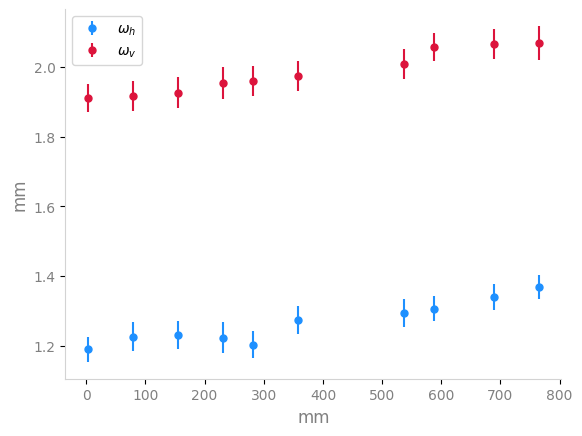

In [ ]:
minimal_plot(d,stds_container_h,plot_type='errorbar',yerr=stds_container_h_se,linestyle='',same_plot=True,x_label='mm',y_label='mm')
minimal_plot(d,stds_container_v,plot_type='errorbar',yerr=stds_container_v_se,linestyle='',same_plot=True,color=colors[1],x_label='mm',y_label='mm')
plt.legend(['$\omega_h$','$\omega_v$'])

Text(0, 0.5, 'mm')

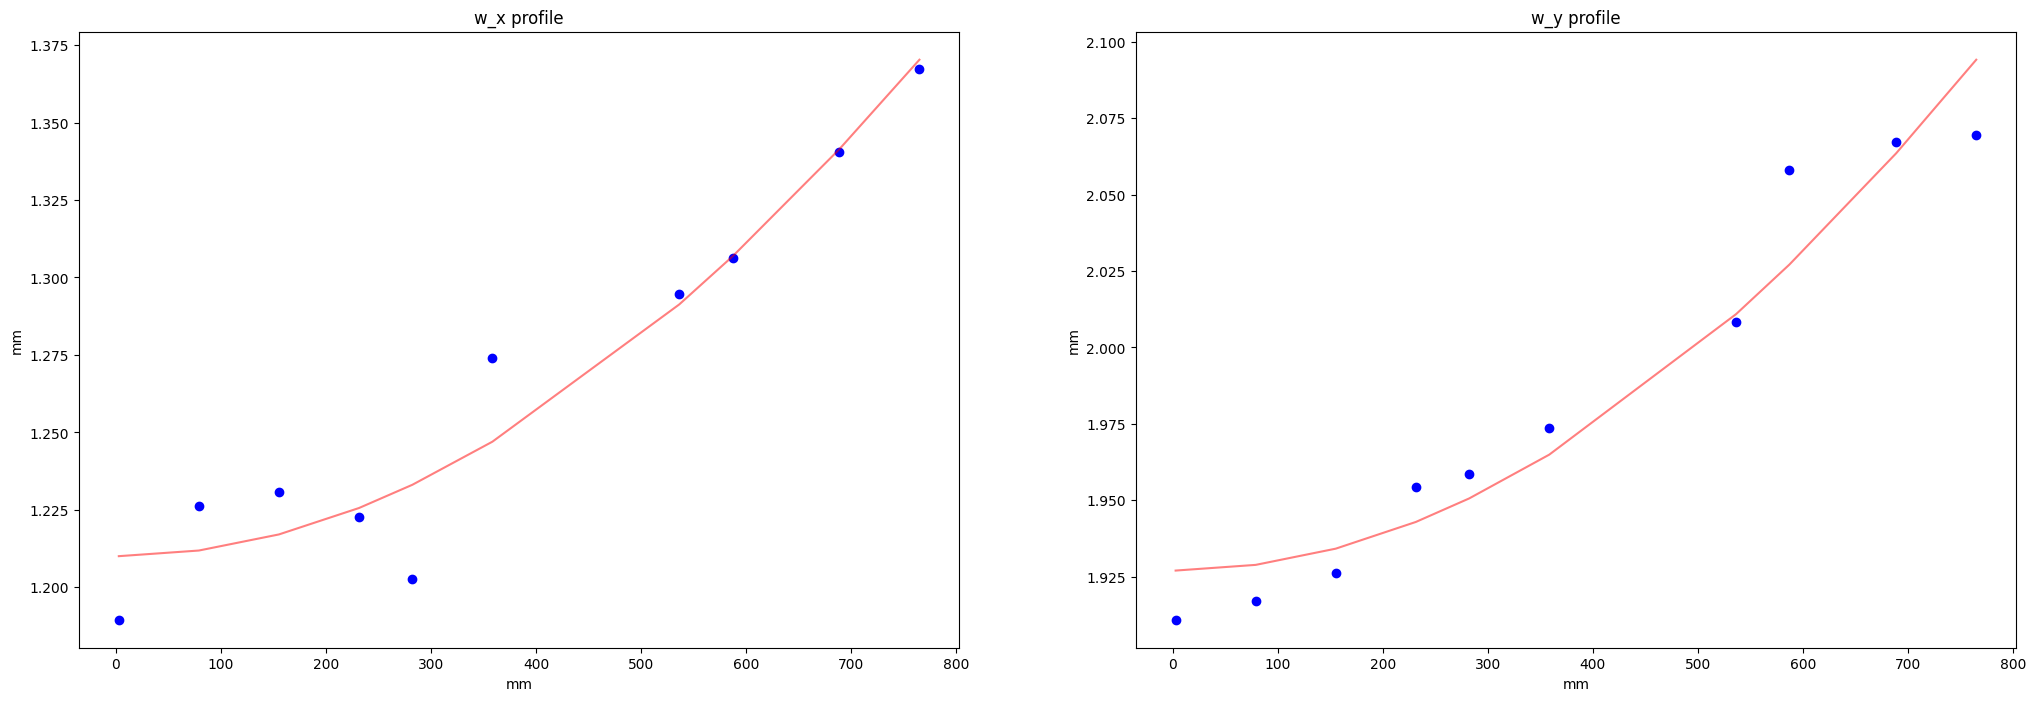

In [ ]:
target_waist_container_h =  []
target_waist_container_v = []
plt.figure(figsize=(25,8))
l = 9.44
d = 2000 - 25.4*(np.array([56,53,50,47,45,42,35,33,29,26]) + (23-l/25.4)*np.ones(10))

#plt.plot(gaussian(amplitude_contaner_h[5*0+i],waist_container_h[5*0+i],center_container_h[5*0+i],l_h),list(mcolors.TABLEAU_COLORS)[5*0+i])
target_waist_h = np.abs(stds_container_h) # beam star csv gives cm^-2 for amplitude and mm for abscissa
p_0_waist_h = np.array([1,76e-3])
pfit_waist_h,pcov_waist_h = leastsq(waist_profile_residual,p_0_waist_h,args=(np.array(d),target_waist_h),full_output=1)[:2]

target_waist_v = np.abs(stds_container_v)
target_waist_container_v.append(target_waist_v)
p_0_waist_v = np.array([45.1006487, 0.00186467848])
pfit_waist_v,pcov_waist_v = leastsq(waist_profile_residual,p_0_waist_v,args=(np.array(d),target_waist_v),full_output=1)[:2]

plt.subplot(1,2,1)
plt.title("w_x profile")
plt.plot(d,target_waist_h,'bo')
#plt.plot(2.5-np.array(x_h),target_waist_h,'bo')
#plt.plot(2.5-np.array(x_h),waist_profile(*pfit_waist_h,2.5-np.array(x_h)),'r',alpha=.05)
plt.plot(d,waist_profile(*pfit_waist_h,d),'r',alpha=.5)
plt.xlabel('mm')
plt.ylabel('mm')
  #[0]*np.ones(len(x)),pfit_waist[1]*np.ones(len(x))
plt.subplot(1,2,2)
plt.title("w_y profile")
#plt.plot(2.5-np.array(x_v),target_waist_v,'bo')
#plt.plot(2.5-np.array(x_v),waist_profile(*pfit_waist_v,2.5-np.array(x_v)),'r',alpha=.05)
plt.plot(d,target_waist_v,'bo')
plt.plot(d,waist_profile(*pfit_waist_v,d),'r',alpha=.5)
plt.xlabel('mm')
plt.ylabel('mm')

In [ ]:
print("M_x = {0:.4f} and w_{{0x}} = {1:.4E} mm".format(pfit_waist_h[0],pfit_waist_h[1]))
print("M_y = {0:.4} and w_{{0y}} = {1:.4E} mm".format(*pfit_waist_v))

M_x = 3.0795 and w_{0x} = 1.2101E+00 mm
M_y = 4.389 and w_{0y} = 1.9270E+00 mm


This essentially closes the chapter on the M^2 of this laser.  This should be a much better estimate and it makes sense that it is close to the other one.  We learned that the data was not good enought to do curve fitting on, although it is fun to do so.  In that case, finding its second moment in much more reliable.